In [1]:
import geopandas as gpd
import pandas as pd
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

<h2>Creating GeoDataframes</h2>

<h3>Datasets</h3>

In [2]:
#Seattle City Boundary Polygon
seaCity = gpd.read_file("./data/Seattle_Area_Polygon_-142470933516081067.geojson")
seaCity = seaCity.to_crs('EPSG:32610')

In [3]:
#Amsterdam City Boundary Polygon
url2 = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=INDELING_GEBIED&THEMA=gebiedsindeling"
aNeighborhood = gpd.read_file(url2)
aNeighborhood = aNeighborhood.to_crs('EPSG:32632')
amCity = aNeighborhood.dissolve()

In [4]:
#Seattle Bike Facilities
bike = gpd.read_file("./data/SDOT_Bike_Facilities_existing.geojson")
multi = gpd.read_file("./data/SDOT_Bike_Facilities_multiuse.geojson")
planned = gpd.read_file("./data/SDOT_Bike_Facilities_planned.geojson")
sBike = bike.to_crs('EPSG:32610')
sMulti = multi.to_crs('EPSG:32610')
sPlanned = planned.to_crs('EPSG:32610')

In [5]:
#merging datasets together
current_sBike = pd.concat([sBike, sMulti])
all_sBike = pd.concat([sBike, sMulti, sPlanned])

In [6]:
#Amsterdam Bike Facilities
url2 = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=FIETSNETTEN&THEMA=fietsnetten"
abike = gpd.read_file(url2)
amBike = abike.to_crs('EPSG:32632')

<h2>Area Comparisions</h2>

In [7]:
seaArea = seaCity.area / 1000000
seaArea[0]

238.03031395933098

In [8]:
amArea = amCity.area/1000000
amArea[0]

214.92198415746003

<h3>Seattle Current Bike Facilites</h3>

In [9]:
sBuffer = current_sBike.buffer(400)
sBufferGDF = gpd.GeoDataFrame(geometry=gpd.GeoSeries(sBuffer))
sDissolve = sBufferGDF.dissolve()
sClip = sDissolve.clip(seaCity)

In [10]:
sBikeArea = sClip.area / 1000000
sPercent = (sBikeArea / seaArea) * 100
print(f'One can access {sPercent[0]:.1f}% of Seattle by bike facilties')

One can access 80.9% of Seattle by bike facilties


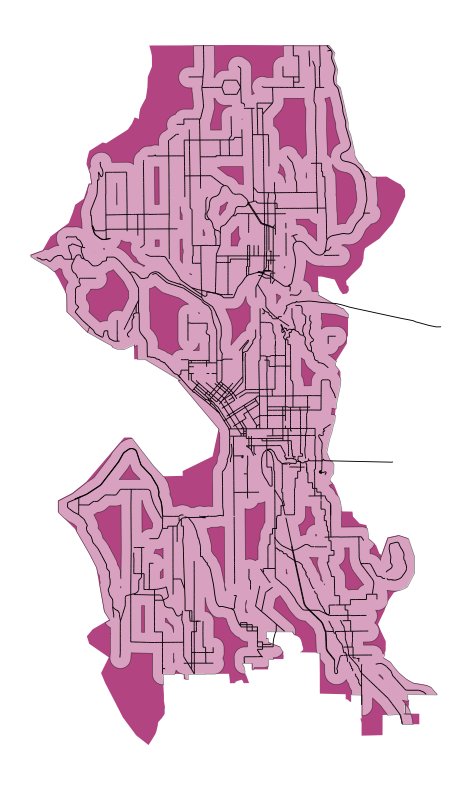

In [19]:
fig, ax = plt.subplots(figsize=(14,10))

ax.set_axis_off()
seaCity.plot(ax=ax, color='#B14481')
sClip.plot(ax=ax, alpha=0.5, color='white', edgecolor= 'black', linewidth=.5)
current_sBike.plot(ax=ax, color='black', linewidth=.65)
plt.savefig('./maps/SeattleBuffer_Current.jpeg')
plt.show()
#need to add title and legend and update colors

<h3>Seattle Planned Bike Facilites</h3>

In [20]:
sBuffer_P = all_sBike.buffer(400)
sBufferGDF_P = gpd.GeoDataFrame(geometry=gpd.GeoSeries(sBuffer_P))
sDissolve_P = sBufferGDF_P.dissolve()
sClip_P = sDissolve_P.clip(seaCity)

In [21]:
sBikeArea_P = sClip_P.area / 1000000
sPercent_P = (sBikeArea_P / seaArea) * 100
print(f'One can access {sPercent_P[0]:.1f}% of Seattle by current and planned bike facilities')

One can access 95.3% of Seattle by current and planned bike facilities


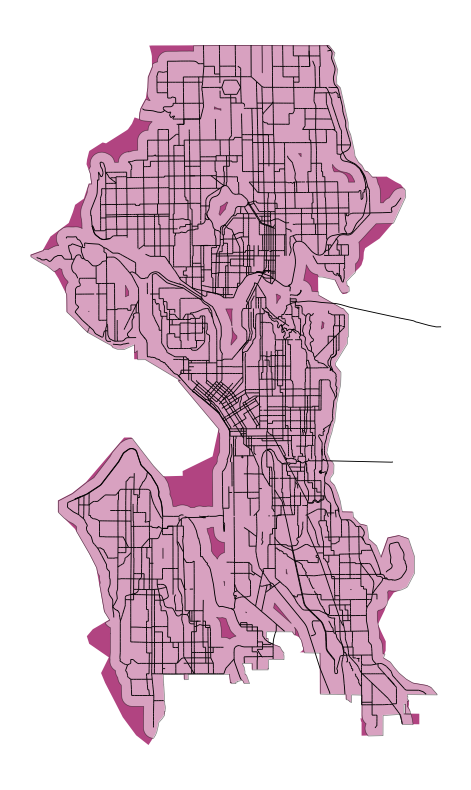

In [22]:
fig, ax = plt.subplots(figsize=(14,10))

ax.set_axis_off()
seaCity.plot(ax=ax, color='#B14481')
sClip_P.plot(ax=ax, alpha=0.5, color='white', edgecolor= 'black', linewidth=.5)
all_sBike.plot(ax=ax, color='black', linewidth=.65)
plt.savefig('./maps/SeattleBuffer_Planned.jpeg')
plt.show()
#need to add title and legend and update colors

<h3>Amsterdam Bike Facilites</h3>

In [23]:
aBuffer = amBike.buffer(400)
aBufferGDF = gpd.GeoDataFrame(geometry=gpd.GeoSeries(aBuffer))
aDissolve = aBufferGDF.dissolve()
aClip = aDissolve.clip(amCity)

In [24]:
aBikeArea = aClip.area / 1000000
aPercent = (aBikeArea / amArea) * 100
print(f'One can access {aPercent[0]:.1f}% of Amsterdam by bike facilties')

One can access 75.4% of Amsterdam by bike facilties


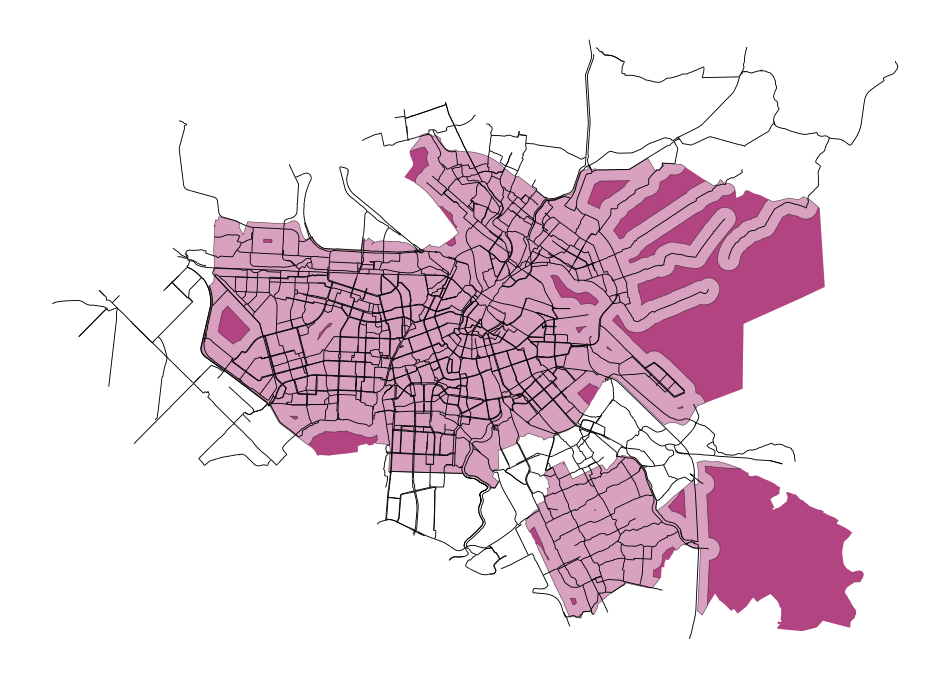

In [25]:
fig, ax = plt.subplots(figsize=(12,9))

ax.set_axis_off()
amCity.plot(ax=ax, color='#B14481')
aClip.plot(ax=ax, alpha=0.5, color='white', edgecolor= 'black', linewidth=.5)
amBike.plot(ax=ax, color='black', linewidth=.65)
plt.savefig('./maps/AmsterdamBuffer.jpeg')
plt.show()
#need to add title and legend and update colors